In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recommendation-system-challenge-music-suggestion/Data Set Description.pdf
/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/sample_submission.csv/sample_submission.csv
/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/songs.csv/songs.csv
/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/song_extra_info.csv/song_extra_info.csv
/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/train.csv/train.csv
/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/test.csv/test.csv
/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/members.csv/members.csv


In [124]:
train_df = pd.read_csv('/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/train.csv/train.csv')
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [125]:
train_df.shape

(7377418, 6)

In [126]:
test_df = pd.read_csv('/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/test.csv/test.csv')
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [127]:
test_df.shape

(2556790, 6)

In [128]:
members_df = pd.read_csv('/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/members.csv/members.csv')
print(members_df.shape)
members_df.head()

(34403, 7)


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [129]:
members_df = pd.read_csv('/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/members.csv/members.csv')
print(members_df.shape)
members_df.head()


(34403, 7)


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [130]:
songs_df = pd.read_csv('/kaggle/input/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/songs.csv/songs.csv')
print(songs_df.shape)
songs_df.head()

(2296320, 7)


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [131]:
song_merged_df = train_df.merge(songs_df, on='song_id')
print(song_merged_df.shape)
song_merged_df.head()

(7377304, 12)


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584,1259,Various Artists,NaN,NaN,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512,1019,Soundway,Kwadwo Donkoh,NaN,-1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0


In [132]:
full_merged_df = song_merged_df.merge(members_df, on='msno')
print(full_merged_df.shape)
full_merged_df.head()

(7377304, 18)


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,20120102,20171005


In [133]:
full_merged_df.isna().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414796
source_type                 21539
target                          0
song_length                     0
genre_ids                  118341
artist_name                     0
composer                  1675592
lyricist                  3178698
language                       36
city                            0
bd                              0
gender                    2961436
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

In [134]:
full_merged_df['source_system_tab'].value_counts()

source_system_tab
my library      3684666
discover        2179236
search           623267
radio            476691
listen with      212264
explore          167946
notification       6185
settings           2200
Name: count, dtype: int64

In [135]:
full_merged_df['source_system_tab'] = full_merged_df['source_system_tab'].fillna('my library')
full_merged_df['source_system_tab'].value_counts()

source_system_tab
my library      3709515
discover        2179236
search           623267
radio            476691
listen with      212264
explore          167946
notification       6185
settings           2200
Name: count, dtype: int64

In [136]:
full_merged_df['source_screen_name'].value_counts()

source_screen_name
Local playlist more     3228154
Online playlist more    1294685
Radio                    474457
Album more               420131
Search                   298479
Artist more              252425
Discover Feature         244244
Discover Chart           213658
Others profile more      201794
Discover Genre            82201
My library                75978
Explore                   72341
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: count, dtype: int64

In [137]:
full_merged_df['source_screen_name'] = full_merged_df['source_screen_name'].fillna('Local playlist more')
full_merged_df['source_screen_name'].value_counts()

source_screen_name
Local playlist more     3642950
Online playlist more    1294685
Radio                    474457
Album more               420131
Search                   298479
Artist more              252425
Discover Feature         244244
Discover Chart           213658
Others profile more      201794
Discover Genre            82201
My library                75978
Explore                   72341
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: count, dtype: int64

In [138]:
full_merged_df['source_type'].value_counts()

source_type
local-library             2261370
online-playlist           1967917
local-playlist            1079481
radio                      483099
album                      477316
top-hits-for-artist        423606
song                       244719
song-based-playlist        210522
listen-with                192840
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: count, dtype: int64

In [139]:
full_merged_df['source_type'] = full_merged_df['source_type'].fillna('local-library')
full_merged_df['source_type'].value_counts()

source_type
local-library             2282909
online-playlist           1967917
local-playlist            1079481
radio                      483099
album                      477316
top-hits-for-artist        423606
song                       244719
song-based-playlist        210522
listen-with                192840
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: count, dtype: int64

In [140]:
full_merged_df['language'].value_counts()

language
 3.0     4044643
 52.0    1864789
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
Name: count, dtype: int64

In [141]:
full_merged_df['language'] = full_merged_df['language'].fillna('3.0')
full_merged_df['language'].value_counts()

language
 3.0     4044643
 52.0    1864789
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
 3.0          36
Name: count, dtype: int64

In [142]:
full_merged_df.isna().sum()

msno                            0
song_id                         0
source_system_tab               0
source_screen_name              0
source_type                     0
target                          0
song_length                     0
genre_ids                  118341
artist_name                     0
composer                  1675592
lyricist                  3178698
language                        0
city                            0
bd                              0
gender                    2961436
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

In [143]:
target_one = full_merged_df[full_merged_df['target'] == 1]
target_one['song_length'].describe()

count    3.714610e+06
mean     2.450000e+05
std      6.156664e+04
min      1.393000e+03
25%      2.154570e+05
50%      2.420760e+05
75%      2.717770e+05
max      1.085171e+07
Name: song_length, dtype: float64

In [144]:
target_zero = full_merged_df[full_merged_df['target'] == 0]
target_zero['song_length'].describe()

count    3.662694e+06
mean     2.452437e+05
std      7.273719e+04
min      1.950000e+03
25%      2.135770e+05
50%      2.415800e+05
75%      2.723700e+05
max      7.621067e+06
Name: song_length, dtype: float64

In [145]:
import seaborn as sns


<Axes: xlabel='count', ylabel='city'>

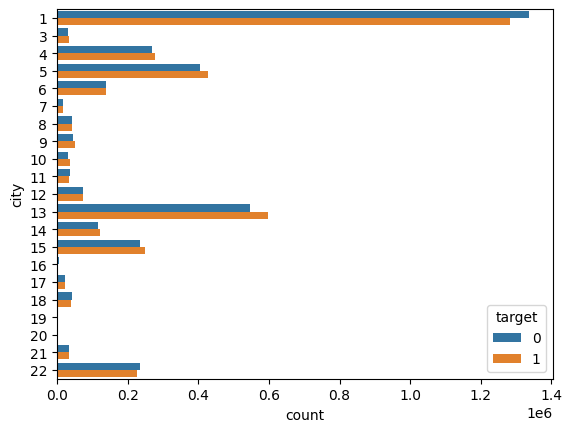

In [146]:
sns.countplot(data=full_merged_df, y='city', hue='target')

In [147]:
full_merged_df['bd'].value_counts()

bd
0       2940459
25       261903
24       258684
26       257863
22       255728
         ...   
89           11
93           10
78            7
1051          6
76            3
Name: count, Length: 92, dtype: int64

In [148]:
correct_age = full_merged_df[(full_merged_df['bd'] < 60) & (full_merged_df['bd'] > 18)]

In [149]:
correct_age['bd'].value_counts()

bd
25    261903
24    258684
26    257863
22    255728
27    253062
28    232545
23    228251
21    222084
29    211188
30    203154
20    189437
31    161843
32    151541
19    141063
33    127451
34    115322
35    112528
36     82628
37     79721
38     75164
40     54284
39     52675
41     51377
43     35301
44     33542
45     31929
42     31695
47     31195
46     30650
50     21613
49     20863
48     19532
51     18568
54     14372
53     14261
52     12576
55     11039
59      6337
57      6151
58      5955
56      5307
Name: count, dtype: int64

In [150]:
t_age_one = correct_age[correct_age['target'] == 1]
print(t_age_one['bd'].mean())
t_age_zero = correct_age[correct_age['target'] == 0]
print(t_age_zero['bd'].mean())

29.009686595807075
29.52063717923035


<Axes: xlabel='count', ylabel='source_type'>

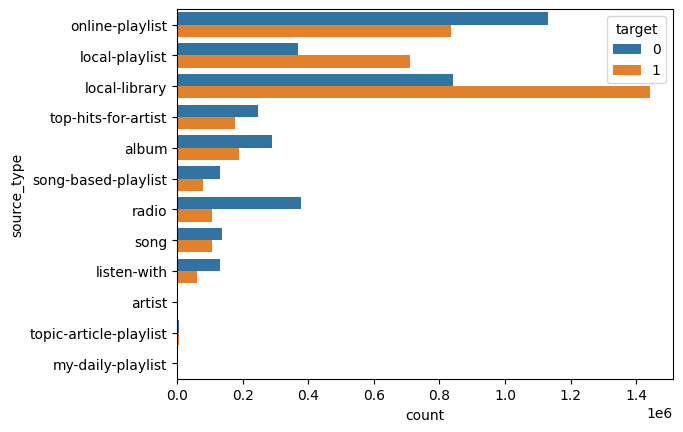

In [151]:
sns.countplot(data=full_merged_df, y='source_type', hue='target')

<Axes: xlabel='count', ylabel='source_screen_name'>

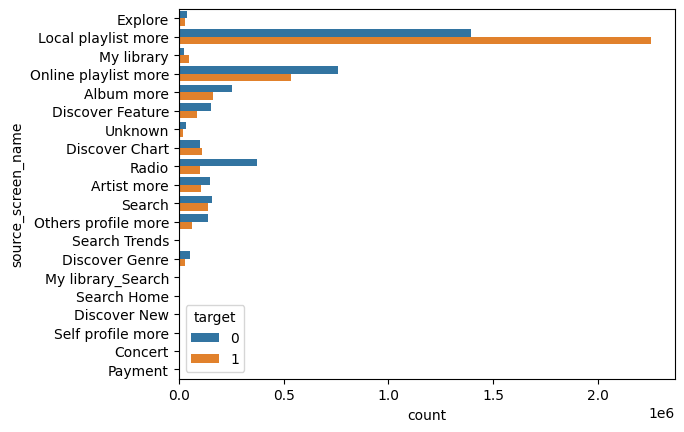

In [152]:
sns.countplot(data=full_merged_df, y='source_screen_name', hue='target')

<Axes: xlabel='count', ylabel='source_system_tab'>

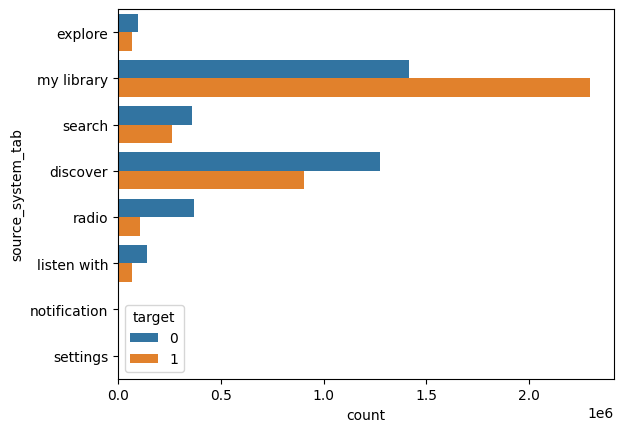

In [153]:
sns.countplot(data=full_merged_df, y='source_system_tab', hue='target')

INSIGHTS:

* Song Length and city really does not affect whether a user will listen to a song again within a month
* Mean age is the same, but younger people (18-25) and older people (45 and above) tend to listen to a song again within a month more than the middle aged people
* People generally overwhelmingly tend to stick to their own local playlists/libraries, as shown by the three plots of 3 features indicating where they repeatedly listen to a song within a month. It is one of the only 'majorities' (i.e. more people listen to a song repeatedly than not) of about 10 different sources 